# Fully Connected Neural Network

"Artificial neural networks (ANN) are computing systems vaguely inspired by the biological neural networks that constitute animal brains." [[link](https://en.wikipedia.org/wiki/Artificial_neural_network)]

![Fully Connected Neural Network](https://raw.githubusercontent.com/previtus/cci_exploring_machine_intelligence/master/week02_basic-building-blocks/ml02_fully_connected_neural_network_illustration.png)



# Starter code

imports:

In [0]:
# Imports for the libraries we will use ...
from __future__ import print_function
# Keras for neural network models
import keras 
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
# Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [0]:
# Load the dataset and explore it:

# MNIST DATASET
(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = 10

# Flattening the data!
#  28x28 -> 784
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0

# One hot vector encoding:
# "label 0" -> [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# "label 1" -> [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
# ... etc!
# "label 9" -> [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
# Let's look at the data:

# Training set
print("Training set:")
print('x (image data) =', x_train.shape)
print('y (labels data) =', y_train.shape)

# Are the dimensionalities something we expect?

In [0]:
def show_image(image, label): # helper function
    print ('Label:', label)
    print ('Digit in the image', np.argmax(label))
    plt.imshow(image.reshape(28,28),cmap='gray')
    plt.show()

i = 0 # select one of the 60000 images!
show_image(x_train[i], y_train[i])

### Creating a model

We will use Keras to create a simple model here!


In [0]:
# Fully Connected Neural Network MODEL
from keras.layers import Dense

model = keras.models.Sequential()

In [0]:
# function to add a new layer:
# - model.add( ... )

# create one layer full of 300 neurons
# - Dense(300)
#   some basic settings include choosing activation function

In [0]:
# first layer with 300 neurons
model.add(Dense(300, activation='relu', input_shape=(784,)))

In [0]:
# second layer with 100 neurons
model.add(Dense(100, activation='relu'))

In [0]:
# final layer with 10 neurons
model.add(Dense(num_classes, activation='softmax')) 

# softmax is an activation function which will make all the outputs
#  sum to 1 (then they are better fitted with one-hot vectors)

In [0]:
model.summary()

In [0]:
# PS: another helpful function:
from keras.utils import plot_model
plot_model(model, show_shapes=True)

### Training a model

In [0]:
# First set it up with compile (we select the optimizer functions etc)
#   - SGD is Stochastic Gradient Descent = something similar to what we saw in the slides ...

#model.compile( ... )
# setting up
# - loss function (error)
#     mean_squared_error gives you:
#         (prediction - label)^2
# - optimizer algorithm (remember gradient descent?)
# - metrics (what we also want to evaluate during the training (for example for statistics))
#   (ps: metrics don't influence how the model will train)

model.compile(loss='categorical_crossentropy', #  mean_squared_error
              optimizer='sgd',  # RMSprop()
              metrics=['accuracy'])


PS: There are many error functions to choose from. Remember that for each sample (for example each one image) we are comparing the outputs of the network (the predictions) with the labels they should have. These are both vectors (of size 10 in this case).


Mean squared error:

> ![mean_squared_error](https://wikimedia.org/api/rest_v1/media/math/render/svg/e258221518869aa1c6561bb75b99476c4734108e)


Categorical Cross-entropy:

> ![categorical_crossentropy](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQediZV_J9oWckQU6SMM1bwIJUF05pYb3QJQQhJ3t3YoFcax5Ve&usqp=CAU)

In [0]:
# This will train the model with all data for one iteration:

# model.fit( ... )
# We simply can:
#model.fit(x_train, y_train)

# Or to repeat it several times with some validation data:
history = model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

In [0]:
# What about the results?
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 35us/step
Test loss: 0.0854789314698428
Test accuracy: 0.9753999710083008


In [0]:
# PS: For plotting we can also look at the history of the training process:
# print(history.history)

Let's now use the model!

In [0]:
i = 20 #22 # 22 has 6, 1033 has messy 8
image = x_test[i]
correct_label = y_test[i]
show_image(image, correct_label)

input_in_list = np.asarray([image])
prediction = model.predict(input_in_list)

print("We predicted:", prediction[0])
for class_number, number_prediction in enumerate(prediction[0]):
    print(class_number, "=>", np.round(number_prediction, 2))

In [0]:
plt.plot(prediction[0])
plt.ylim(0,1) # predictions are in between 0 and 1
plt.xlim(0,9) # 10 classes
plt.show()

# Bonus: Looking inside the neural network!

Let's get a little bit hacky!

We can explore the weights (w_i from the slides) and activations (x_i and y_i from the slides) of the network we just trained.

In [0]:
layer_name = 'dense_2' # change this one depending on which layer you want to inspect
intermediate_layer_model = keras.models.Model(
                    inputs=model.input,
                    outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(input_in_list)

print("Activations inside the neural network:", intermediate_output.shape)

In [0]:
# To get why and how this works, we can try: 
# intermediate_layer_model.summary()

In [0]:
layer_name = 'dense_2'
weights = model.get_layer(layer_name).get_weights()
W, b = weights
print("Weights of a fully connected layer:")
print("weights for W (multiplication of inputs):", W.shape)
print("weights for b (bias):", b.shape)

# set_weights(weights)

In [0]:
# We can look at all of them

for layer in model.layers:
    weights = layer.get_weights() # list of numpy arrays
    print(layer.name, ", W" ,weights[0].shape, ", b", weights[1].shape)

To get the values for weights and activations can be used for example for visualizations (such as we saw in http://www.cs.cmu.edu/~aharley/vis/fc/flat.html ). Each square there (neuron) has brightness depending on it's activation. Each connection has brightness depending on the strength of that particular weight (w_i).

### Directly accessing the weights?

This also allows us to directly change them. Why would we like that? To change them / to break the model / to explore what's happening.

In [0]:
# to have a cloned version of the model (using a lazy solution here, but it works)
model.save("hax.h5") # saves compiled state
model_copy = keras.models.load_model("hax.h5")

In [0]:
# select an input image
i = 136
input_in_list = np.asarray([x_test[i]])

# then select which layer we want to 'adjust'

layer_name = 'dense_2'
weights = model.get_layer(layer_name).get_weights()
W, b = weights

W = W*0.0
b = b*1.0

weights = W, b
model_copy.get_layer(layer_name).set_weights(weights)
# set_weights(weights)

prediction = model.predict(input_in_list)
print("original model says:", np.argmax(prediction), " ... ", prediction)

hacked_prediction = model_copy.predict(input_in_list)
print("hacked model says:", np.argmax(hacked_prediction), " ... ", hacked_prediction)

# Solution code

imports:

In [0]:
# Imports for the libraries we will use ...
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

## Loading and inspecting the MNIST dataset

In [0]:
# MNIST DATASET
(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = 10

# Flattening the data!
#  28x28 -> 784
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# One hot vector encoding:
# "label 0" -> [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# "label 1" -> [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
# ... etc!
# "label 9" -> [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


Label: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Digit in the image 5


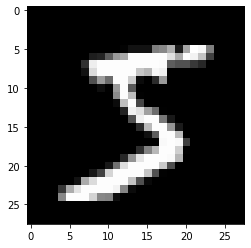

Label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Digit in the image 0


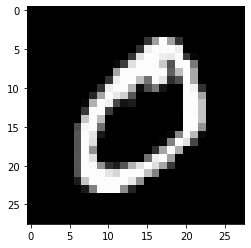

In [0]:
%matplotlib inline
images = x_train[0:2]
labels = y_train[0:2]
for index, image in enumerate(images):
    print ('Label:', labels[index])
    print ('Digit in the image', np.argmax(labels[index]))
    plt.imshow(image.reshape(28,28),cmap='gray')
    plt.show()

## Creating and training the model

In [0]:
# Fully Connected Neural Network MODEL

model = Sequential()
model.add(Dense(300, activation='relu', input_shape=(784,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_10 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Training the model:
batch_size = 128
epochs = 20

# First setup few things (like which function will be used for optimization)
# ps: some of these are not the best - but they were chosen for illustration to match what we studied about.
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(), # RMSprop()
              metrics=['accuracy'])

# And then start up the training:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 48us/step - loss: 1.0469 - accuracy: 0.7484 - val_loss: 0.5109 - val_accuracy: 0.8753
Epoch 2/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.4443 - accuracy: 0.8837 - val_loss: 0.3700 - val_accuracy: 0.9000
Epoch 3/20
60000/60000 [==============================] - 3s 48us/step - loss: 0.3579 - accuracy: 0.9010 - val_loss: 0.3189 - val_accuracy: 0.9120
Epoch 4/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.3175 - accuracy: 0.9108 - val_loss: 0.2912 - val_accuracy: 0.9188
Epoch 5/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.2911 - accuracy: 0.9182 - val_loss: 0.2695 - val_accuracy: 0.9267
Epoch 6/20
60000/60000 [==============================] - 3s 47us/step - loss: 0.2710 - accuracy: 0.9230 - val_loss: 0.2542 - val_accuracy: 0.9302
Epoch 7/20
60000/60000 [==============================] - 3s 47us/st

Plot:


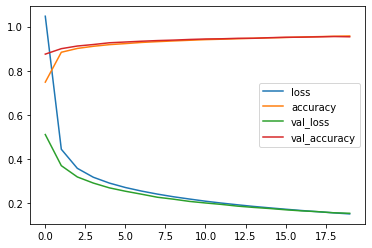

In [0]:
# Great! ... Wait ... so what happened?

# Here we can visualize the progess of the error (loss) going down and the accuracy going up!

loss = history.history["loss"]
accuracy = history.history["accuracy"]
val_loss = history.history["val_loss"]
val_accuracy = history.history["val_accuracy"]

epochs_array = list(range(epochs))
plt.plot(epochs_array, loss, label="loss")
plt.plot(epochs_array, accuracy, label="accuracy")
plt.plot(epochs_array, val_loss, label="val_loss")
plt.plot(epochs_array, val_accuracy, label="val_accuracy")
plt.legend()

print("Plot:")